In [1]:
import altair as alt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
def plot_pca(df):
    scaler = StandardScaler()
    d = scaler.fit_transform(df)
    pca = PCA(n_components=2)
    d_pca = pd.DataFrame(pca.fit_transform(d), index=df.index)
    d_pca.reset_index(inplace=True)
    d_pca.rename(columns={'index':'name', 0:'pc1', 1:'pc2'}, inplace=True)
    return alt.Chart(d_pca).mark_point().encode(
        x='pc1:Q',
        y='pc2:Q'
    ).properties(
        width=600,
        height=400
    ).interactive().mark_text().encode(text='name')

In [3]:
raw = pd.read_csv("data/reddit.csv")
raw = raw[raw.understand_scale=='Yes']
raw.drop('understand_scale', axis=1, inplace=True) # We only take entries who say they understand the scale.
raw.drop('write_in', axis=1, inplace=True)
raw.drop('Timestamp', axis=1, inplace=True)

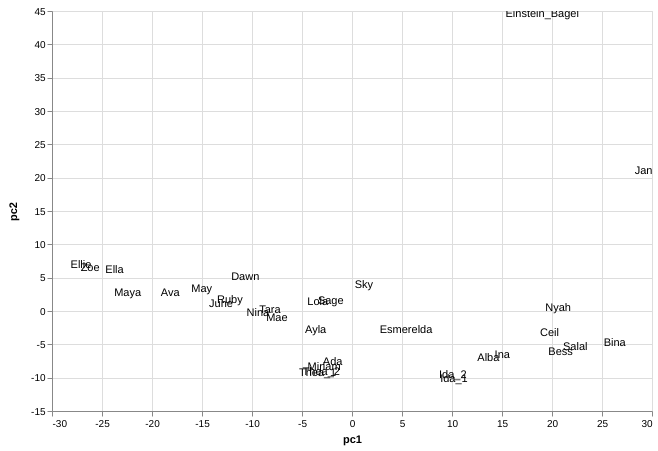

In [4]:
overall_d = raw.copy().transpose()
overall_d.drop('gender', inplace=True)
plot_pca(overall_d)

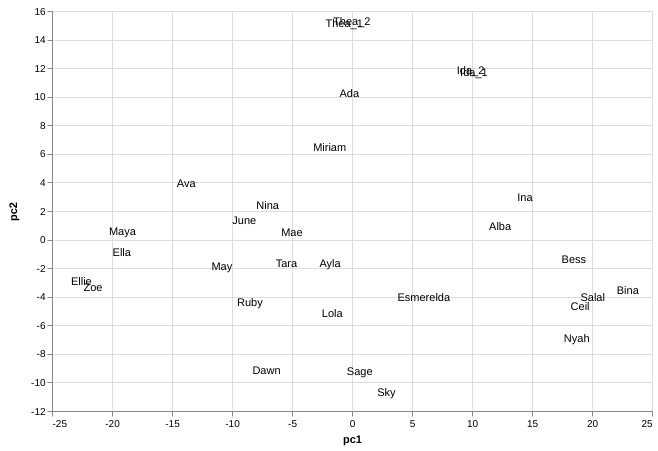

In [5]:
no_jokes = raw.copy()
no_jokes.drop('gender', axis=1, inplace=True)
no_jokes = no_jokes[(no_jokes.Einstein_Bagel==1) & (no_jokes.Janet2==1)]
no_jokes.drop('Einstein_Bagel', axis=1, inplace=True)
no_jokes.drop('Janet2', axis=1, inplace=True)
no_jokes = no_jokes.transpose()
plot_pca(no_jokes)

### Most liked names: linear scale

In [6]:
overall_d.sum(axis=1).sort_values(ascending=False).head(20)

Ellie     3585.0
Zoe       3545.0
Maya      3499.0
Ella      3466.0
Ava       3357.0
May       3187.0
June      3170.0
Ruby      3138.0
Mae       3040.0
Dawn      3009.0
Nina      2988.0
Tara      2926.0
Thea_1    2880.0
Thea_2    2877.0
Sage      2864.0
Ayla      2829.0
Miriam    2782.0
Lola      2749.0
Ada       2736.0
Sky       2597.0
dtype: float64

### Least disliked names

In [7]:
((overall_d==1)|(overall_d==2)).sum(axis=1).sort_values().head(20)

Ellie     353
Zoe       373
Maya      378
Ella      392
Ava       442
May       475
June      491
Ruby      510
Mae       539
Nina      541
Dawn      561
Tara      590
Thea_1    611
Thea_2    612
Sage      616
Ayla      617
Miriam    644
Lola      657
Ada       670
Sky       699
dtype: int64